# <font color='green'>Credit Card Fraud Detection using Logistic Regression Classifier</font>
### by Hamza Thamlaoui

<a href="https://www.kaggle.com/datasets/kartik2112/fraud-detection" style="text-decoration: underline;"><strong>Click here to access the Data</strong></a>

In [194]:
# Data Loading and Initial Inspection

import pandas as pd

# Load the dataset
data = pd.read_csv('fraudTrain.csv')

# Display the first few rows
print("First few rows of the dataset:")
print(data.head())

# Display basic information about the dataset
print("\nDataset Info:")
data.info()


First few rows of the dataset:
   Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street  ...      lat      long  \
0    Banks      F                561 Perry Cove  ...  36.0788  -81.1781   
1     Gill      F  43039 

In [195]:
# Data Preprocessing

# Drop unnecessary columns
data.drop(['trans_date_trans_time', 'merchant', 'first', 'last', 'street', 'dob', 'trans_num', 'unix_time'], axis=1, inplace=True)

# Apply dummy encoding to 'gender'
data['gender_M'] = pd.get_dummies(data['gender'], drop_first=True).astype(int)

# Drop the original 'gender' column
data.drop('gender', axis=1, inplace=True)

# Initialize LabelEncoder for categorical features
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Encode categorical columns
cat_cols = ['category', 'city', 'state', 'job']
for col in cat_cols:
    data[f'{col}_lbl'] = le.fit_transform(data[col])

# Drop original categorical columns after encoding
data.drop(cat_cols, axis=1, inplace=True)

# Display the updated dataset columns
print("\nUpdated Dataset Columns:")
print(data.columns)



Updated Dataset Columns:
Index(['Unnamed: 0', 'cc_num', 'amt', 'zip', 'lat', 'long', 'city_pop',
       'merch_lat', 'merch_long', 'is_fraud', 'gender_M', 'category_lbl',
       'city_lbl', 'state_lbl', 'job_lbl'],
      dtype='object')


In [197]:
# Separate features and target variable
X = data.drop('is_fraud', axis=1)
y = data['is_fraud']

# Normalize features

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [198]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print(f"\nTraining set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")



Training set shape: (1037340, 14)
Testing set shape: (259335, 14)


In [199]:
# Training the Logistic Regression Model

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [200]:
# Making Predictions and Evaluating Performance

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))




Confusion Matrix:
[[257670    145]
 [  1520      0]]
Accuracy: 0.993579732778067

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    257815
           1       0.00      0.00      0.00      1520

    accuracy                           0.99    259335
   macro avg       0.50      0.50      0.50    259335
weighted avg       0.99      0.99      0.99    259335



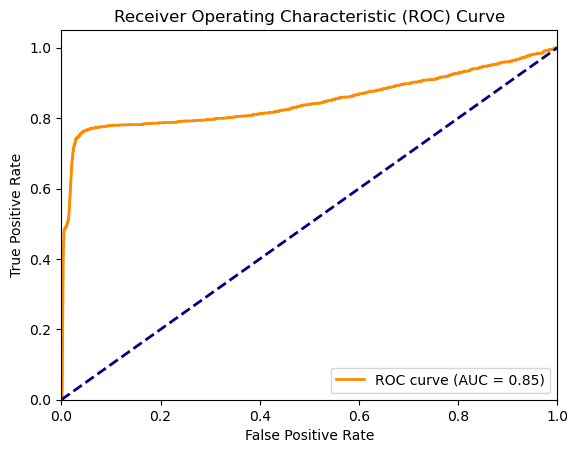

In [201]:
#Plotting the ROC Curve

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

